# 3- Reproduce evaluation baseline on custom task

In the previous notebook, you have seen how to evaluate a checkpoint using the lm-evaluation-harness package on public benchmark like Hellaswag.

In this notebook, we will reproduce the baseline evaluation on our variant of MMLU that is reported in the paper.

## Install our fork of `lm-evaluation-harness`

Since this variant of MMLU has not been integrated to the public lm-evaluation-harness yet, we will have to install it from our fork at: https://github.com/tiiuae/lm-evaluation-harness-competition.git

For the purpose of this competition, you would also develop a custom benchmark on your custom fork of `lm-evals` and thus will need to install it directly from git as well.


In [ ]:
!pip install -U accelerate git+https://github.com/tiiuae/lm-evaluation-harness-competition.git transformers -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Let list all the available tasks to make sure the version is install correctly.

In [ ]:
!lm-eval --tasks list | grep mmlu_var5shots

2025-06-27 08:27:46.151817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751012866.172385    4758 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751012866.178876    4758 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-27 08:27:46.198923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
|mmlu_var5shots                                  |lm_eval/tasks/mmlu/var5shots/_mmlu.yaml                                    

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

# Running the evaluation

With the correct lm-evaluation-harness installed, the process of running on our benchmark is essentially the same as any other tasks as shown in the previous notebooks.

Let's try running a small subset `mmlu_var5shots_stem` first.

In [ ]:
!accelerate launch -m lm_eval --model hf \
    --model_args pretrained=tiiuae/dense-500m-arch1,dtype=bfloat16,subfolder=iter_0004000 \
    --tasks mmlu_var5shots_astronomy \
    --batch_size auto \
    --output_path results/

ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-27 08:28:30.939719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751012910.959615    4992 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751012910.965747    4992 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

You can always check the logged results in the `results/` directory that we specified above.

In [ ]:
!ls results/

tiiuae__dense-500m-arch1


### Checkpoint 24k steps

In [ ]:
!accelerate launch -m lm_eval --model hf \
    --model_args pretrained=tiiuae/dense-500m-arch1,dtype=bfloat16,subfolder=iter_0024000 \
    --tasks mmlu_var5shots_astronomy \
    --batch_size auto \
    --output_path results/

ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-27 08:30:51.042937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751013051.062807    5650 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751013051.068758    5650 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

# Checkpoints 44k steps


In [ ]:
!accelerate launch -m lm_eval --model hf \
    --model_args pretrained=tiiuae/dense-500m-arch1,dtype=bfloat16,subfolder=iter_0042000 \
    --tasks mmlu_var5shots_astronomy \
    --batch_size auto \
    --output_path results/

ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-06-27 08:33:21.575058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751013201.595456    6507 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751013201.601621    6507 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

# Gathering results and plots their performance

In [ ]:
from pathlib import Path
import json

results = []
for json_file in sorted(Path("results/").glob("**/*.json")):
    with json_file.open() as f:
        results.append(json.load(f))

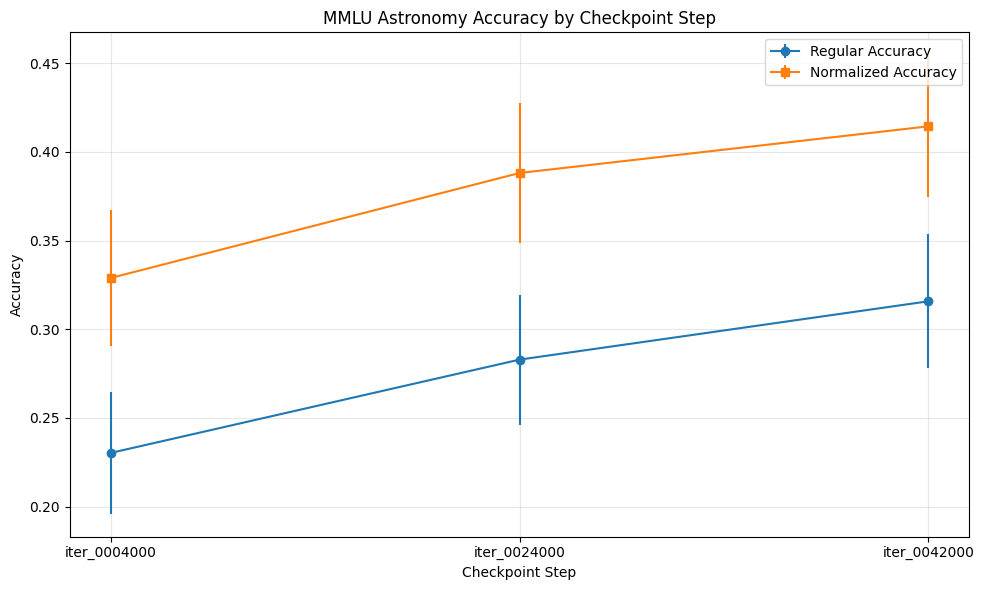

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data in a variable called 'results'
# Let's extract the relevant information for plotting

# Lists to store the checkpoint steps and corresponding accuracies
steps = []
accuracies = []
accuracies_norm = []
error_bars = []
error_bars_norm = []

# Extract data from the results list
for checkpoint_data in results:
    step = checkpoint_data["configs"]["mmlu_var5shots_astronomy"]["metadata"]["subfolder"]
    steps.append(step)

    # Extract the accuracy data
    result_data = list(checkpoint_data['results'].values())[0]  # Get the first (and only) subject
    accuracies.append(result_data['acc,none'])
    accuracies_norm.append(result_data['acc_norm,none'])
    error_bars.append(result_data['acc_stderr,none'])
    error_bars_norm.append(result_data['acc_norm_stderr,none'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both regular and normalized accuracy
ax.errorbar(steps, accuracies, yerr=error_bars, fmt='o-', label='Regular Accuracy')
ax.errorbar(steps, accuracies_norm, yerr=error_bars_norm, fmt='s-', label='Normalized Accuracy')

# Add labels and title
ax.set_xlabel('Checkpoint Step')
ax.set_ylabel('Accuracy')
ax.set_title('MMLU Astronomy Accuracy by Checkpoint Step')
ax.legend()
ax.grid(True, alpha=0.3)

# If steps are not evenly spaced, you might want to adjust x-ticks
if len(steps) > 0:
    plt.xticks(steps)

# Show the plot
plt.tight_layout()
plt.show()

# You can also save the plot
# plt.savefig('mmlu_astronomy_accuracy.png', dpi=300)

# Going further

This notebook demonstrates how we can easily launch a custom evaluation tasks and analyze its results.

In the next notebook, we will show you how to create such a custom benchmark in the lm-evaluation-harness framework.